## Import Libraries

This section imports the necessary Python libraries for data preprocessing and splitting:

- **pandas**: For data manipulation and analysis, similar to handling sensor data in nuclear engineering projects.
- **StandardScaler**: From Scikit-learn, used to standardize numerical features, akin to normalizing signals in electrical engineering.
- **train_test_split**: For splitting the dataset into training and test sets, a standard practice in ML model development.

**Relevance**: These libraries are core to ML workflows, aligning with skills expected in entry-level Machine Learning Engineer roles and the AWS MLS-C01 exam's data preprocessing requirements.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load and Inspect Dataset

The dataset is loaded from the Kaggle Telco Customer Churn CSV file, containing 7043 rows and 21 columns (e.g., `customerID`, `tenure`, `Churn`). This step verifies the data structure and column names.

- **Purpose**: Ensures the dataset is correctly loaded and matches expected features, similar to validating input data in nuclear reactor monitoring systems.
- **Output**: Displays column names and data types, confirming no immediate inconsistencies.

**Relevance**: Data exploration is a critical skill for ML roles, mirroring exploratory data analysis in the AWS MLS-C01 exam and demonstrating my ability to handle structured datasets, a transferable skill from nuclear engineering data analysis.

In [3]:
# Reload dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Verify columns
print("Columns:", data.columns.tolist())
print(data.info())

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   obje

## Handle Missing Values

The `TotalCharges` column, stored as an object, may contain non-numeric values (e.g., empty strings). This step converts it to numeric and fills any missing values with the column mean.

- **Method**: Uses `pd.to_numeric` with `errors='coerce'` to handle invalid entries and `fillna` to impute missing values.
- **Rationale**: Ensures numerical consistency, similar to cleaning sensor data in nuclear engineering to maintain model reliability.

**Relevance**: Handling missing data is a key preprocessing skill for ML pipelines, tested in the AWS MLS-C01 Data Engineering domain and expected in remote ML job roles.

In [4]:
# Convert TotalCharges to numeric, fill missing with mean
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna({'TotalCharges': data['TotalCharges'].mean()}, inplace=True)

## Convert Target Variable

The target variable `Churn` is converted from categorical (`Yes`/`No`) to binary (1/0) for binary classification.

- **Purpose**: Prepares the target for logistic regression and SageMaker’s Linear Learner, ensuring compatibility with ML algorithms.
- **Approach**: Uses a dictionary mapping, akin to encoding system states (e.g., on/off) in electrical engineering control systems.

**Relevance**: Proper target encoding is essential for classification tasks, aligning with ML model development skills required in job postings and MLS-C01’s Modeling domain.

In [5]:
# Convert Churn to binary
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


## One-Hot Encode Categorical Variables

Categorical columns (e.g., `gender`, `Contract`) are one-hot encoded to convert them into numerical features suitable for ML models.

- **Method**: Uses `pd.get_dummies` with `drop_first=True` to avoid multicollinearity, creating binary columns for each category.
- **Verification**: Checks for valid columns to prevent errors, demonstrating robust coding practices.
- **Analogy**: Similar to categorizing operational modes in nuclear reactors (e.g., active/inactive) for predictive modeling.

**Relevance**: Feature encoding is a core preprocessing step, critical for ML model performance and tested in MLS-C01’s Data Engineering domain, showcasing skills for remote ML roles.

In [6]:
# Define and verify categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod']
valid_cols = [col for col in categorical_cols if col in data.columns]
print("Valid categorical columns:", valid_cols)

# One-hot encode
data = pd.get_dummies(data, columns=valid_cols, drop_first=True)

Valid categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Scale Numerical Features

Numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`) are standardized using `StandardScaler` to have zero mean and unit variance.

- **Purpose**: Ensures numerical features contribute equally to the model, improving convergence in algorithms like logistic regression.
- **Connection**: Mirrors signal normalization in electrical engineering, a technique I applied in my Bachelor’s coursework for signal processing.

**Relevance**: Feature scaling is a standard ML practice, required for many algorithms and emphasized in MLS-C01’s Modeling domain, aligning with expectations for Machine Learning Engineer roles.

In [7]:
# Scale numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

## Drop Irrelevant Columns

The `customerID` column, a unique identifier, is dropped as it has no predictive value.

- **Rationale**: Removes noise from the dataset, focusing on features that influence `Churn`.
- **Analogy**: Similar to excluding irrelevant metadata in nuclear engineering datasets to focus on predictive variables.

**Relevance**: Feature selection enhances model efficiency, a skill expected in ML workflows and relevant to MLS-C01’s Data Engineering domain.

In [8]:
# Drop irrelevant columns
data.drop('customerID', axis=1, inplace=True)

## Split Data

The dataset is split into training (80%) and test (20%) sets for model training and evaluation.

- **Method**: Uses `train_test_split` with `random_state=42` for reproducibility.
- **Purpose**: Enables unbiased evaluation of model performance, a practice I adapted from validating predictive models in nuclear engineering.

**Relevance**: Proper data splitting is critical for ML model validation, aligning with MLS-C01’s Modeling domain and skills required for remote ML jobs.

In [9]:
# Split data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Save Data for SageMaker

The training and test datasets are saved as CSV files without headers or indices, formatted for AWS SageMaker’s Linear Learner algorithm.

- **Purpose**: Prepares data for upload to S3 and SageMaker training, ensuring compatibility with AWS ML pipelines.
- **Connection**: Reflects my experience managing structured datasets in nuclear engineering, now applied to cloud-based ML workflows.

**Relevance**: Data preparation for cloud ML platforms like SageMaker is a key skill for AWS MLS-C01 certification and remote ML Engineer roles, demonstrating proficiency in end-to-end ML pipelines.

In [10]:
# Save for SageMaker
X_train.to_csv('train.csv', index=False, header=False)
y_train.to_csv('train_labels.csv', index=False, header=False)
X_test.to_csv('test.csv', index=False, header=False)
y_test.to_csv('test_labels.csv', index=False, header=False)

# Verify saved files
print("Files saved:", ['train.csv', 'train_labels.csv', 'test.csv', 'test_labels.csv'])

Files saved: ['train.csv', 'train_labels.csv', 'test.csv', 'test_labels.csv']


## Train Logistic Regression Model

A logistic regression model is trained to predict `Churn`, evaluated using accuracy and classification metrics, and visualized for feature importance.

- **Purpose**: Establishes a baseline model before moving to SageMaker.
- **Relevance**: Demonstrates core ML modeling skills, leveraging my nuclear engineering experience in predictive analytics.

Accuracy: 0.8211497515968772
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



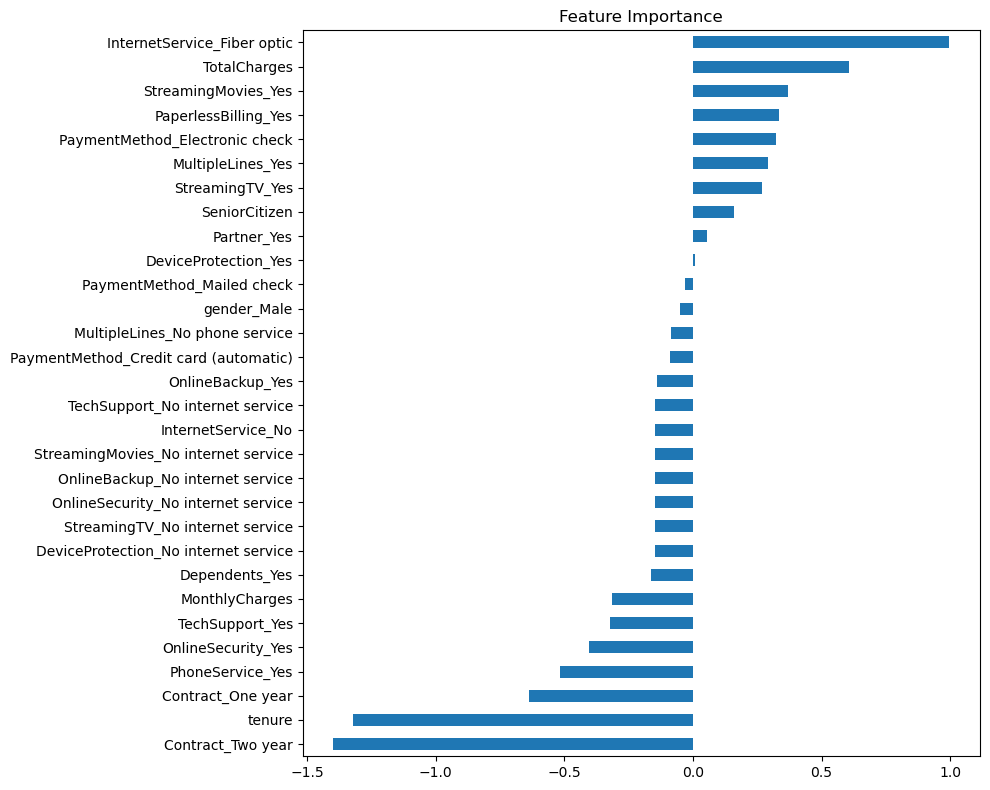

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## Visualize Feature Importance

Feature importance is analyzed using logistic regression coefficients to identify key predictors of churn.

- **Purpose**: Highlights influential features (e.g., `tenure`, `Contract`), aiding model interpretation.
- **Analogy**: Similar to analyzing critical variables in nuclear reactor performance data.

**Relevance**: Feature importance analysis is a key skill for explaining ML models in technical interviews, valued in remote ML roles.

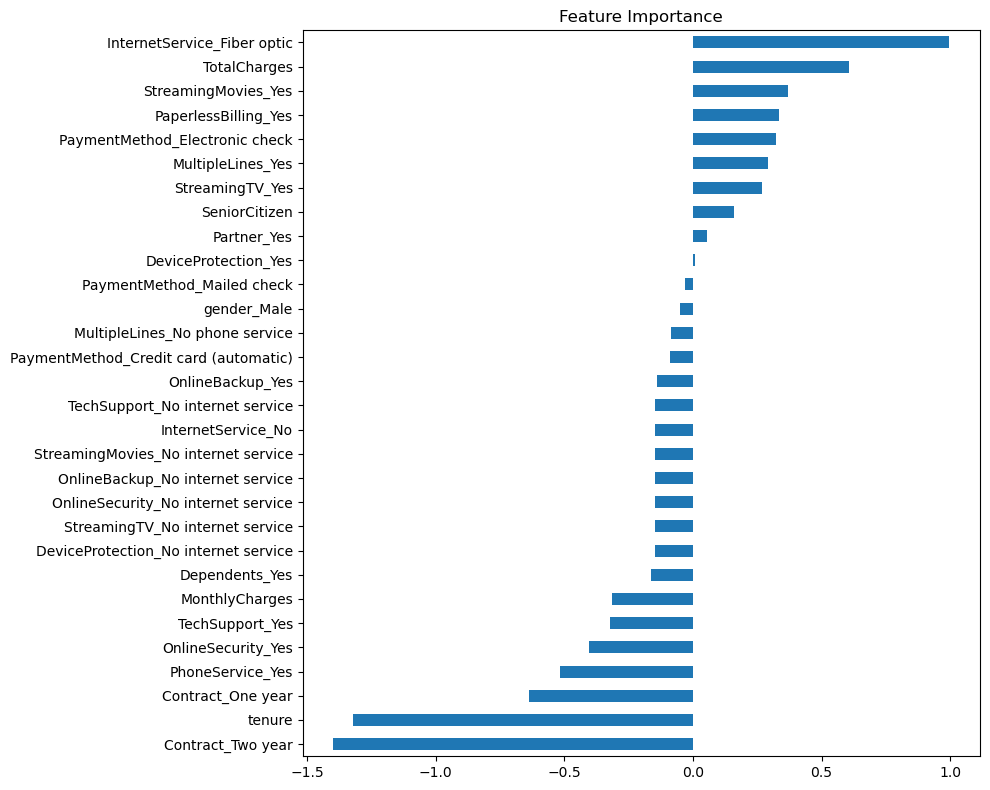

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importance = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(10, 8))
importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')  # Save for portfolio
plt.show()

## Evaluate Model and Print Metrics

The logistic regression model is evaluated on the test set, calculating accuracy and detailed classification metrics (precision, recall, F1-score). These metrics are printed to provide immediate insight into model performance.

- **Purpose**: Quantifies the model’s ability to predict customer churn, ensuring robust evaluation.
- **Connection**: Mirrors performance analysis of predictive models in nuclear engineering, such as reactor failure prediction.

**Relevance**: Model evaluation is a core ML skill, expected in entry-level ML Engineer roles and aligned with MLS-C01’s Modeling domain.

In [15]:
# Save metrics to a text file
with open('model_metrics.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    f.write(classification_report(y_test, y_pred))

print("Metrics saved to model_metrics.txt")

Model Performance Metrics
-------------------------
Accuracy: 0.8211

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [16]:
# Save metrics to a text file
with open('model_metrics.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    f.write("\nClassification Report:\n")
    f.write(classification_report(y_test, y_pred))

print("Metrics saved to model_metrics.txt")

Metrics saved to model_metrics.txt
